# Constructing and Deploying ML Model as REST API

### Data cleaning and Inspection

In [2]:
#Load in necessary packages
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

In [3]:
# read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/rossjackson/Documents/Terra API project/B.HEALTH classification.csv')


# display the first few rows of the dataframe
df.head()

,subject,day,step count,distance travelled (km),calories burnt (kcal),acive time (minutes),actual sleep duration (minutes),sleep onset latency (minutes),duration in bed (minutes),efficiency (%),...,deep sleep duration (minutes) (minutes),REM duration (minutes),awake percentage (%),light sleep percentage (%),deep sleep percentage (%),REM percentage (%),total phone usage / day (minutes),night time phone usage / day (minutes),phone unlock count / day,label
0,1.0,1,3016,2.28,2151,32,455,29.0,518,88.0,...,65,125.0,11.0,57.0,12.548263,24.0,730,686,97,1
1,NaN,2,1790,1.39,2129,19,320,10.0,360,89.0,...,120,50.0,5.0,41.6,33.300000,13.8,532,425,75,1
2,NaN,3,2864,2.07,2032,29,453,23.0,504,90.0,...,56,135.0,9.0,54.0,11.111111,26.0,699,621,95,1
3,NaN,4,1419,1.80,1713,15,449,32.5,518,87.0,...,54,140.0,12.0,51.0,10.424710,27.0,729,672,117,1
4,NaN,5,1698,1.30,1725,18,358,21.0,403,89.0,...,56,94.0,10.0,54.0,13.895782,23.0,850,794,120,1


In [24]:
df.shape
df['efficiency (%)']

0       88.000000
1       89.000000
2       90.000000
3       87.000000
4       89.000000
          ...    
163     99.130435
164     97.985348
165    100.000000
166     82.191781
167     69.623656
Name: efficiency (%), Length: 167, dtype: float64

In [5]:
df.isna().sum()

subject                                    144
day                                          0
step count                                   0
distance travelled (km)                      0
calories burnt (kcal)                        0
acive time (minutes)                         0
actual sleep duration (minutes)              0
sleep onset latency (minutes)                0
duration in bed (minutes)                    0
efficiency (%)                               0
in bed time                                  0
out bed time                                 0
in bed awake duration (minutes)              0
light sleep duration (minutes)               0
deep sleep duration (minutes) (minutes)      0
REM duration (minutes)                       0
awake percentage (%)                         0
light sleep percentage (%)                   0
deep sleep percentage (%)                    0
REM percentage (%)                           0
total phone usage / day (minutes)            0
night time ph

'subject' column is mostly missing, so will remove.

In [6]:
df = df.drop('subject', axis=1)

In [7]:
unique_labels = df['label'].unique()
print(unique_labels)

[1 2 0]


I cant find much documentation on the this dataset and I am unsure as to what the 'label' variable represents. I am going to presume it is referring to gender, however as I am trying to identify potential habitual predictor variables in accordance to sleep quality rather than inherent characteristic, I am also going to remove this column.

In [8]:
df = df.drop('label', axis=1)

Visualising the data to identify any possible expected/unexpected correlations between variables:

<AxesSubplot:>

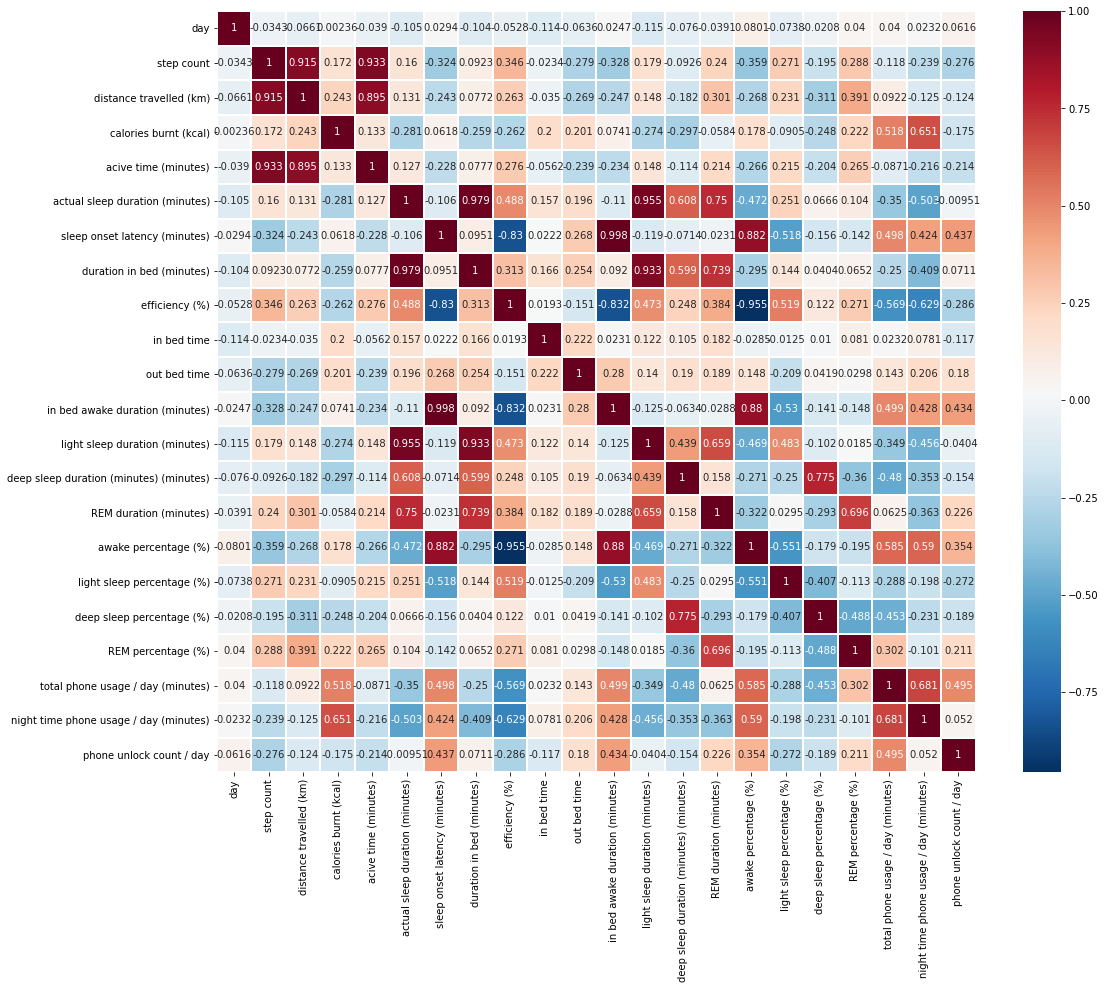

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

pearsoncorr = df.corr(method='pearson')

plt.figure(figsize=(17, 14))
sns.heatmap(pearsoncorr, 
            xticklabels=df.columns,
            yticklabels=df.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1,
            fmt='.3g')


On first glance of this dataset I knew there was a relationship I would be interested in looking into: phone usage vs. sleep quality. From the variables available in this dataset and their correlation values, I have chosen to predict in 'efficiency (%)' based on a persons inputed 'night time phone usage / day (minutes)' value.

Text(0, 0.5, 'Efficiency')

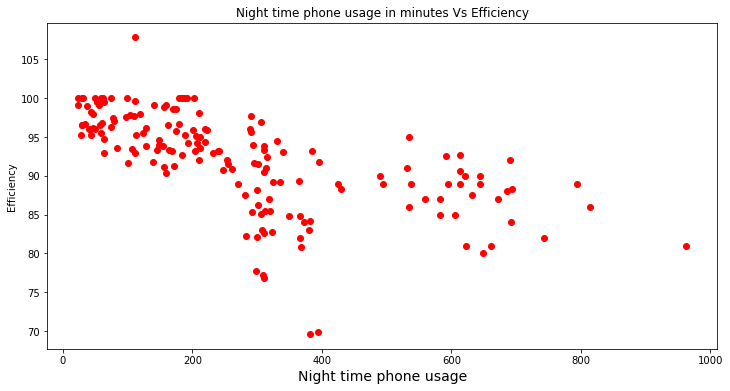

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(df['night time phone usage / day (minutes)'], df['efficiency (%)'], color ='red')
plt.title('Night time phone usage in minutes Vs Efficiency')
plt.xlabel('Night time phone usage', fontsize=14)
plt.ylabel('Efficiency')

As we can see from the above plot, the relationship is certainly there however it is moderate. 
We can also observe an outlier datapoint where the ones sleep efficiency is above 100%. Due to the nature of sleep efficiency being a ratio of time spent in bed asleep vs. awake, such a figure would not be possible. This may be a data entry error, or a problem with the wearable device, however as we are not given much more information on the dataset I will remove the datapoint. 

In [12]:
#Removing the outlier
df = df[df['efficiency (%)'] <= 100]
df.shape

(167, 22)

## Linear Regression Model:

Creating an independent or 'X' variable.

In [13]:
new_df = pd.DataFrame(df['night time phone usage / day (minutes)'])

In [14]:
effic = df['efficiency (%)']
effic

0       88.000000
1       89.000000
2       90.000000
3       87.000000
4       89.000000
          ...    
163     99.130435
164     97.985348
165    100.000000
166     82.191781
167     69.623656
Name: efficiency (%), Length: 167, dtype: float64

In [15]:
lr = linear_model.LinearRegression()
lr.fit(new_df, effic)

LinearRegression()

In [16]:
lr.predict([[600]])

array([85.8173402])

In [17]:
y_predict = lr.predict(new_df)

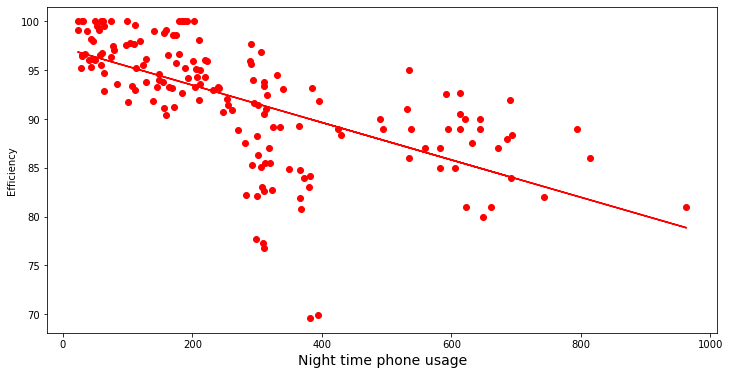

In [18]:
#Plotting predicted vs actual and fitting a best fitted line
plt.figure(figsize=(12,6))
plt.scatter(df['night time phone usage / day (minutes)'], df['efficiency (%)'], color ='red')
plt.plot(df['night time phone usage / day (minutes)'], y_predict,'r')
plt.xlabel('Night time phone usage', fontsize=14)
plt.ylabel('Efficiency')
plt.show()

In [19]:
print("Intercept :", lr.intercept_)

print('Slope : ',lr.coef_)

Intercept : 97.3137305320125
Slope :  [-0.01916065]


Text(0, 0.5, 'Efficiency')

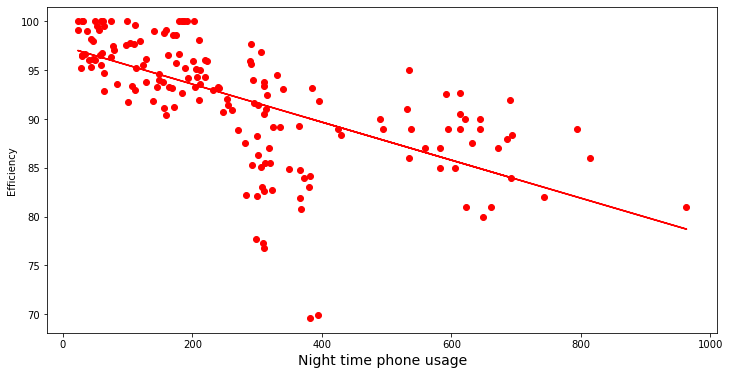

In [20]:
#Manually plotting line with above intercept and slope
plt.figure(figsize=(12,6))
plt.scatter(df['night time phone usage / day (minutes)'], df['efficiency (%)'], color ='red')
plt.plot(df['night time phone usage / day (minutes)'],-0.01947184*df['night time phone usage / day (minutes)']+ 97.4758495651834,'r')
plt.xlabel('Night time phone usage', fontsize=14)
plt.ylabel('Efficiency')

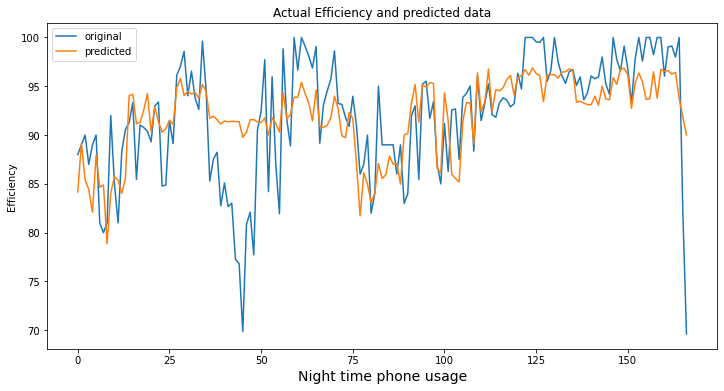

In [22]:
plt.figure(figsize=(12,6))
x_ax = range(len(df['efficiency (%)']))
plt.plot(x_ax, df['efficiency (%)'], label = 'original')
plt.plot(x_ax, y_predict, label='predicted')
plt.title('Actual Efficiency and predicted data')
plt.xlabel('Night time phone usage', fontsize=14)
plt.ylabel('Efficiency')
plt.legend()
plt.show()

As we can see, the model does a relatively good job at the estimation, with curve pattern similarites etc.

### New RandomForest Model and performance graph:

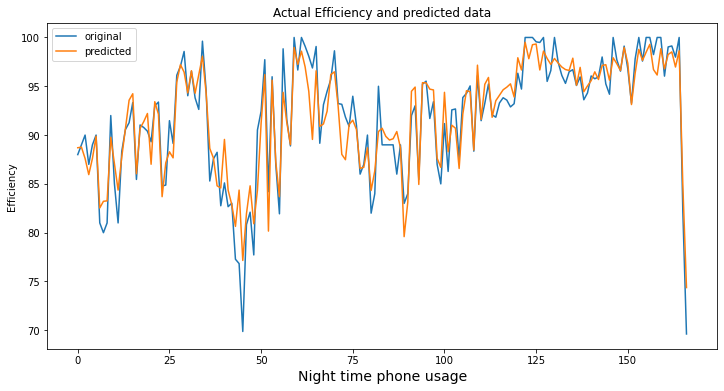

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

new_df = pd.DataFrame(df['night time phone usage / day (minutes)'])
effic = df['efficiency (%)']

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(new_df, effic)

y_predict_rf = rf_regressor.predict(new_df)

plt.figure(figsize=(12,6))
x_ax = range(len(df['efficiency (%)']))
plt.plot(x_ax, df['efficiency (%)'], label='original')
plt.plot(x_ax, y_predict_rf, label='predicted')
plt.title('Actual Efficiency and predicted data')
plt.xlabel('Night time phone usage', fontsize=14)
plt.ylabel('Efficiency')
plt.legend()
plt.show()


As we can see here, the Random forest regressor model is a far better fit for the data, eliminating the deviated region seen in with the Linear Regression Model. 

### Splitting the data into training and test sets, and seperating our predictor and response variable. 

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
X = df[['night time phone usage / day (minutes)']]

In [21]:
y = df['efficiency (%)']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)

### Model performance testing: (linear regression model)

In [26]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R-squared:', r2)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)

R-squared: 0.3278097969272711
Mean squared error: 24.851898320425622
Root mean squared error: 4.985167832723952


As we can see here, the model has a moderate fit. It indicates that around 32% of the variation in the 'efficiency' variable is explained by the indepedent variable, night time phone usage. However, the model would have a stronger fit if the MSE and RMSE figures were lower.

## The updated RandomForest Model

In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pickle

X = df[['night time phone usage / day (minutes)']]
y = df['efficiency (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

with open("trained_model_rf.pkl", "wb") as file:
    pickle.dump(rf_regressor, file)

with open('trained_model_rf.pkl', 'rb') as f:
    model = pickle.load(f)

X = df[['night time phone usage / day (minutes)']]
y = df['efficiency (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
